# Loan Classification

 Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,classification_report

In [66]:
df = pd.read_csv("Loan Prediction Dataset.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [67]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
df.shape

(614, 13)

In [69]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# New Attribute

In [71]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


# Data Preprocessing

In [72]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [73]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [74]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [75]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [76]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [77]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

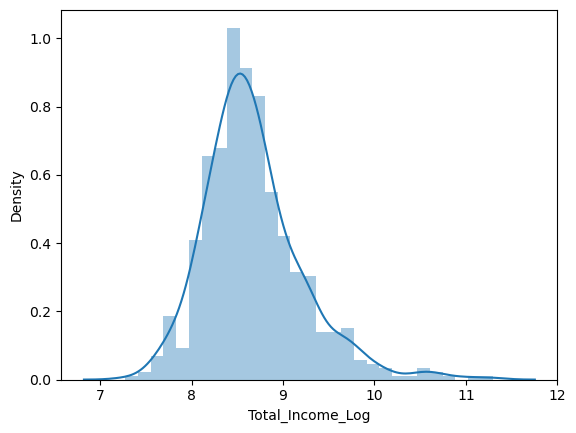

In [78]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])

<AxesSubplot:>

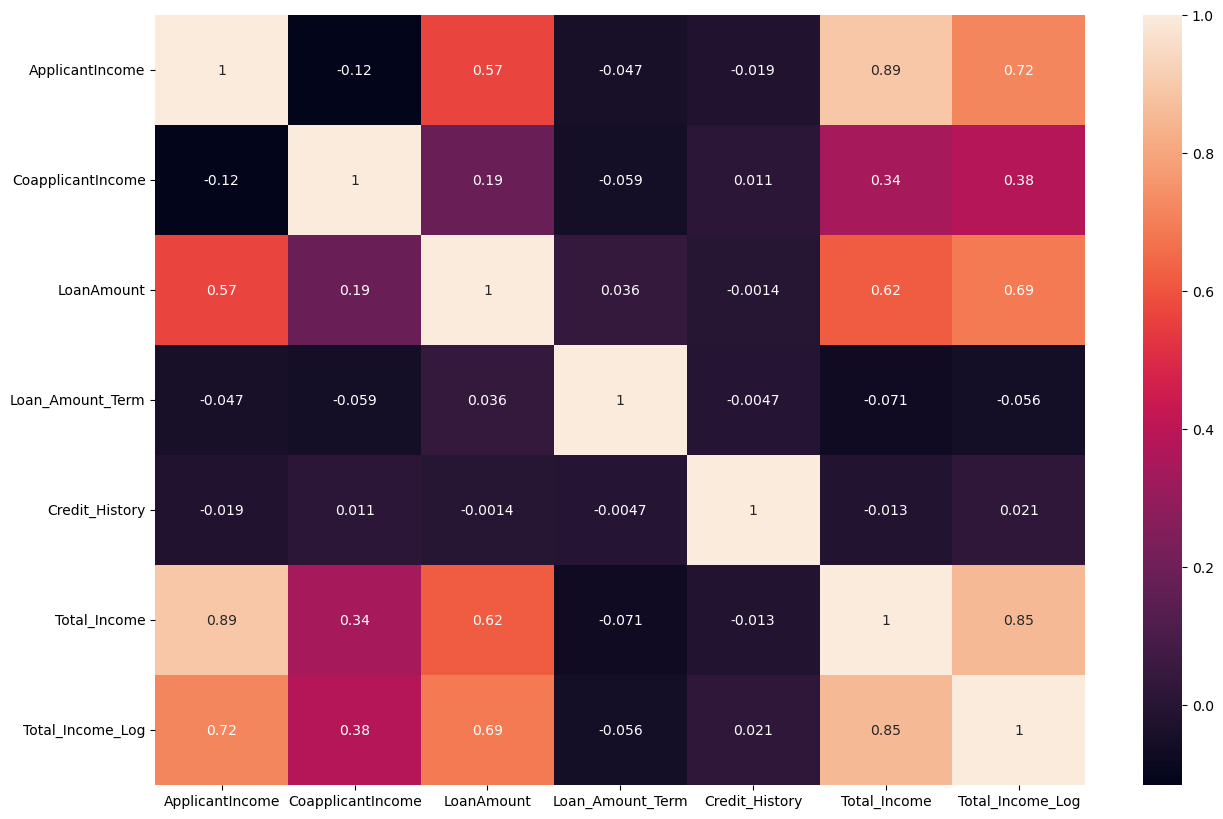

In [79]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

In [80]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "Total_Income", 'Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income_Log
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,8.674197
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,8.714732
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,8.006701
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,8.505525
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,8.699681


# Column Transformation

In [81]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Dependents","Education",'Self_Employed',"Property_Area","Loan_Status",]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [82]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income_Log
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,8.674197
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,8.714732
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,8.006701
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,8.505525
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360.0,1.0,0,1,7.972811
610,1,1,3,0,0,40.000000,180.0,1.0,0,1,8.320448
611,1,1,1,0,0,253.000000,360.0,1.0,2,1,9.025576
612,1,1,2,0,0,187.000000,360.0,1.0,2,1,8.933796


In [84]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
df3=mms.fit_transform(df)

In [87]:
df4=pd.DataFrame(df3)
df4

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.000000,0.0,0.0,0.198860,0.743590,1.0,1.0,1.0,0.347520
1,1.0,1.0,0.333333,0.0,0.0,0.172214,0.743590,1.0,0.0,0.0,0.357583
2,1.0,1.0,0.000000,0.0,1.0,0.082489,0.743590,1.0,1.0,1.0,0.181795
3,1.0,1.0,0.000000,1.0,0.0,0.160637,0.743590,1.0,1.0,1.0,0.305642
4,1.0,0.0,0.000000,0.0,0.0,0.191027,0.743590,1.0,1.0,1.0,0.353847
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.089725,0.743590,1.0,0.0,1.0,0.173381
610,1.0,1.0,1.000000,0.0,0.0,0.044863,0.358974,1.0,0.0,1.0,0.259691
611,1.0,1.0,0.333333,0.0,0.0,0.353111,0.743590,1.0,1.0,1.0,0.434759
612,1.0,1.0,0.666667,0.0,0.0,0.257598,0.743590,1.0,1.0,1.0,0.411972


# Splitting of data

In [97]:
# specify input and output attributes
X = df4.drop(columns=[9], axis=1)
y = df4[9]

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Fitting

#  1)DT

In [99]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(Y_test, y_pred)
mse_dt = mean_squared_error(Y_test, y_pred)
accuracy_score_dt=accuracy_score(Y_test,y_pred)

print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("Accuracy is", accuracy_score_dt)

Mean Absolute Error: 0.2845528455284553
Mean Squared Error: 0.2845528455284553
Accuracy is 0.7154471544715447


# 2)Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,Y_train)
# Make predictions
y_pred1 = model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(Y_test, y_pred1)
mse_rf = mean_squared_error(Y_test, y_pred1)
accuracy_score_rf=accuracy_score(Y_test,y_pred1)
print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("Accuracy is", accuracy_score_rf)

Mean Absolute Error: 0.2845528455284553
Mean Squared Error: 0.2845528455284553
Accuracy is 0.7642276422764228


# 3)Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
# Make predictions
y_pred11 = model1.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(Y_test, y_pred11)
mse_lr = mean_squared_error(Y_test, y_pred11)
accuracy_score_lr=accuracy_score(Y_test,y_pred11)

print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("Accuracy is", accuracy_score_lr)

Mean Absolute Error: 0.21138211382113822
Mean Squared Error: 0.21138211382113822
Accuracy is 0.7886178861788617


# 4)GBC

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()
grad.fit(X_train,Y_train)

# Make predictions
y_pred2 = grad.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(Y_test, y_pred2)
mse_gb = mean_squared_error(Y_test, y_pred2)
accuracy_score_gb=accuracy_score(Y_test,y_pred2)

print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
print("Accuracy is", accuracy_score_gb)

Mean Absolute Error: 0.25203252032520324
Mean Squared Error: 0.25203252032520324
Accuracy is 0.7479674796747967


# 5)KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train,Y_train)
# Make predictions
y_pred3 = knn.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(Y_test, y_pred3)
mse_knn = mean_squared_error(Y_test, y_pred3)
accuracy_score_knn=accuracy_score(Y_test,y_pred3)

print("Mean Absolute Error:", mae_knn)
print("Mean Squared Error:", mse_knn)
print("Accuracy is", accuracy_score_knn)

Mean Absolute Error: 0.2601626016260163
Mean Squared Error: 0.2601626016260163
Accuracy is 0.7398373983739838


# 6) SVM

In [104]:
from sklearn.svm import SVC
svc= SVC(kernel="linear")
svc.fit(X_train,Y_train)
# Make predictions
y_pred4 = svc.predict(X_test)

# Evaluate the model
mae_svc = mean_absolute_error(Y_test, y_pred4)
mse_svc = mean_squared_error(Y_test, y_pred4)
accuracy_score_svc=accuracy_score(Y_test,y_pred4)

print("Mean Absolute Error:", mae_svc)
print("Mean Squared Error:", mse_svc)
print("Accuracy is", accuracy_score_svc)

Mean Absolute Error: 0.21138211382113822
Mean Squared Error: 0.21138211382113822
Accuracy is 0.7886178861788617


#  7)XG Boost

In [105]:
import xgboost as xgb
xgb_model= xgb.XGBClassifier()
xgb_model.fit(X_train,Y_train)

y_pred5=xgb_model.predict(X_test)
# Evaluate the model
mae_xgb = mean_absolute_error(Y_test, y_pred5)
mse_xgb = mean_squared_error(Y_test, y_pred5)
accuracy_score_xgb=accuracy_score(Y_test,y_pred5)

print("Mean Absolute Error:", mae_xgb)
print("Mean Squared Error:", mse_xgb)
print("Accuracy is", accuracy_score_xgb)

Mean Absolute Error: 0.25203252032520324
Mean Squared Error: 0.25203252032520324
Accuracy is 0.7479674796747967


In [107]:
'''
DT = DECISION TREE
LR = Logistic REGRESSION
GBC = GRADIENT BOOSTING CLASSIFIER
SVM = SUPPORT VECTOR MACHINE
RF = RandomForestRegressoR
KNN= K NEAREST NEIGHBOUR
XGB= XG BOOST CLASSIFIER
'''

model_data_1 = pd.DataFrame({'Models':['DT','RF','LR','GBC','KNN','SVM','XGB'],
             "Accuracy score":[accuracy_score_dt,accuracy_score_rf,accuracy_score_lr,accuracy_score_gb,accuracy_score_knn,
                              accuracy_score_svc,accuracy_score_xgb]})

In [108]:
model_data_1 

,Models,Accuracy score
0,DT,0.715447
1,RF,0.764228
2,LR,0.788618
3,GBC,0.747967
4,KNN,0.739837
5,SVM,0.788618
6,XGB,0.747967


# Confusion Matrix

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred11)
cm

array([[18, 25],
       [ 1, 79]], dtype=int64)

<AxesSubplot:>

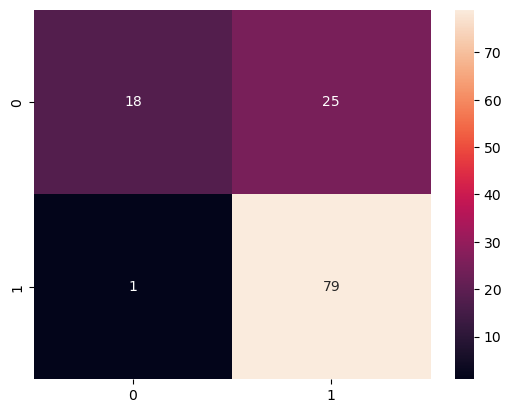

In [110]:
sns.heatmap(cm, annot=True)

In [111]:
print(classification_report(Y_test,y_pred11))

              precision    recall  f1-score   support

         0.0       0.95      0.42      0.58        43
         1.0       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [112]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64